## Directed multi-graph (.gml)

1. Read .gml file


In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

gml_files = glob('../output/network/*/*.gml')

# graph = nx.read_gml('../data/graph/article1.gml')

In [ ]:
# print(len(gml_files))
# gml_files
# gml_files[0]

In [6]:
def calculate_graph_inf(graph):
    graph.name = gml_graph
    info = nx.info(graph)
    print info
    #plot spring layout
    plt.figure(figsize=(10,10))
    nx.draw_spring(graph, arrows=True, with_labels=True)

********************************************************************************
../output/network/positive/article2.gml
Name: ../output/network/positive/article2.gml
Type: MultiDiGraph
Number of nodes: 28
Number of edges: 23
Average in degree:   0.8214
Average out degree:   0.8214


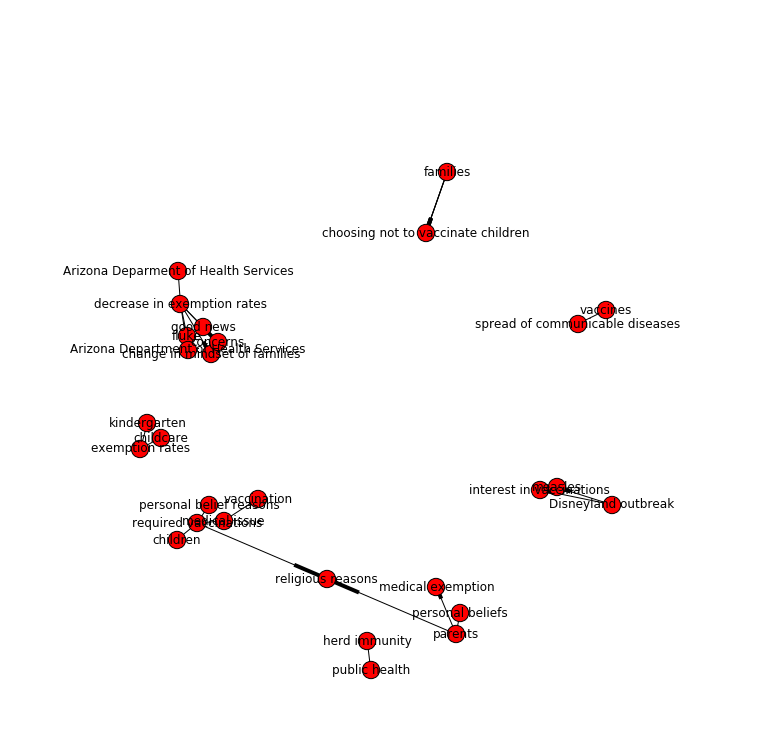

In [7]:
for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    print('*' * 80)
    print(gml_graph)
    calculate_graph_inf(graph)
    if graph_num == 0:
        break

In [8]:
gml_graph

'../output/network/positive/article2.gml'

In [65]:
# create an empty dataframe with columns
# should first start with filename

network_data_columns = ['name',
                        'nodes',
                        'edges',
                        'density',
                        'deg centrality',
                        'bet centrality',
                        'clo centrality',
                        'in-deg',
                        'out-deg',
                        'strong comp',
                        'weak comp',
                        'avg node connect',
                        'deg assort coeff',
                        'pie']

network_data = pd.DataFrame(columns = network_data_columns)

In [66]:
network_data

,name,nodes,edges,density,deg centrality,bet centrality,clo centrality,in-deg,out-deg,strong comp,weak comp,avg node connect,deg assort coeff,pie


In [67]:
# calculate variables

nodes = nx.number_of_nodes(graph)
edges = nx.number_of_edges(graph)
density = nx.density(graph)
deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()

in_deg = np.array(nx.in_degree_centrality(graph).values()).mean()
out_deg = np.array(nx.out_degree_centrality(graph).values()).mean()
strong_comp = nx.number_strongly_connected_components(graph)
weak_comp =  nx.number_weakly_connected_components(graph)
avg_node_con = nx.average_node_connectivity(graph)
deg_assort_coe = nx.degree_assortativity_coefficient(graph)

pie = 3.14



In [68]:
# after all the variables are calculated, save them into list
# name:variable

graph_values = {'name':gml_graph,
                'nodes':nodes,
                'edges':edges,
                'density':density,
                'deg centrality':deg_cen,
                'bet centrality':bet_cen,
                'clo centrality':clo_cen,
                'in-deg':in_deg,
                'out-deg':out_deg,
                'strong comp':strong_comp,
                'weak comp':weak_comp,
                'avg node connect':avg_node_con,
                'deg assort coeff':deg_assort_coe,
                'pie':pie}

network_data = network_data.append(graph_values, ignore_index=True)


In [69]:
network_data

,name,nodes,edges,density,deg centrality,bet centrality,clo centrality,in-deg,out-deg,strong comp,weak comp,avg node connect,deg assort coeff,pie
0,../output/network/positive/article2.gml,28,23,0.030423,0.060847,0.00056,0.033033,0.030423,0.030423,28,7,0.041005,0.063126,3.14


In [26]:
graph_values

{'Avg node connectivity': 0.041005291005291,
 'Degree assortativity coeff': 0.063126317617662048,
 'Degree centrality': 0.060846560846560836,
 'Density': 0.03042328042328042,
 'In-degree': 0.030423280423280415,
 'Name': '../output/network/positive/article2.gml',
 'Out-degree': 0.030423280423280418,
 'Pie': 3.14,
 'Strong comp': 0,
 'Weak comp': 0}

In [ ]:
# degree histogram: returns a list of frequencies of degrees
nx.degree_histogram(graph)

In [ ]:
# degree centrality
nx.degree_centrality(graph).values()

# betweenness centrality
a = nx.betweenness_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['betweenness centrality']
dfIn = dfIn.sort_values(by=['betweenness centrality'])
dfIn

# closeness centrality
nx.closeness_centrality(graph).values()

# current-flow betweenness centrality (graph must be connected; run for largest component)
# nx.current_flow_betweenness_centrality(graph)

# eigenvector centrality

In [16]:
# degree assortativity coefficient
# average neighbor degree,
# average degree connectivity (k nearest neighbors)
nx.degree_assortativity_coefficient(graph)


0.063126317617662048

In [13]:
#nx.edge_connectivity(graph)
#nx.node_connectivity(graph)

#avg_node_con = nx.average_node_connectivity(graph)
nx.average_node_connectivity(graph)

# clustering coefficient (cannot be multigraph)
# nx.average_clustering(graph)


0.041005291005291